Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [1726]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [1727]:
#### Load the movies dataset 
movies_df = pd.read_csv('movies.csv')
movies_df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']` from the data set as they will not be used in the analysis.

In [1728]:
movies_df.drop('homepage',axis=1, inplace=True)
movies_df.drop('keywords',axis=1, inplace=True)
movies_df.drop('original_language',axis=1, inplace=True)
movies_df.drop('original_title',axis=1, inplace=True)
movies_df.drop('overview',axis=1, inplace=True)
movies_df.drop('production_companies',axis=1, inplace=True)
movies_df.drop('status',axis=1, inplace=True)
movies_df.drop('tagline',axis=1, inplace=True)
movies_df.columns


Index(['budget', 'genres', 'id', 'popularity', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

#### Remove any duplicate rows

In [1729]:
movies_df.drop_duplicates(keep='first',inplace=True)

#### Remove rows with missing data 

Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [1730]:
movies_df.isnull().sum()



budget                  0
genres                  0
id                      0
popularity              0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [1731]:
movies_df.dropna(inplace=True)
movies_df.isnull().sum()

budget                  0
genres                  0
id                      0
popularity              0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [1732]:
movies_df.drop([], inplace=True)

#### Change data types
To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into `DateTime` format and extract the year from the date. This will help us in analysing yearly data.

In [1733]:
# Change the release_date column to DateTime

movies_df['release_date'] = pd.to_datetime(movies_df['release_date'].str.strip(), format='%Y-%m-%d')

# Extract the release year from every release date
movies_df['release_date'].dt.year


0       2009
1       2007
2       2015
3       2012
4       2012
        ... 
4798    1992
4799    2011
4800    2013
4801    2012
4802    2005
Name: release_date, Length: 4800, dtype: int32

Change budget and revenue columns to a integer data type using numpy’s `int64` method.

In [1734]:
movies_df['budget'].astype('int64')
movies_df['revenue'].astype('int64')

0       2787965087
1        961000000
2        880674609
3       1084939099
4        284139100
           ...    
4798       2040920
4799             0
4800             0
4801             0
4802             0
Name: revenue, Length: 4800, dtype: int64

On checking the dataset, we see that `genres`, `production_countries`, `spoken_languages` are in the JSON format which will make it difficult to manipulate the dataframe. The `parse_col_json function` flattens these columns into a format that can be easily interpreted.

In [1735]:
# Convert from JSON format to a list of strings
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index, movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index, column] = str(list1)
    
# Flatten data in columns
parse_col_json('genres', 'name')
parse_col_json('production_countries', 'name')
parse_col_json('spoken_languages', 'name')


In [1736]:
# Inspect flattened data
movies_df.sample(1)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
4771,0,['Horror'],220490,0.056459,[],2013-04-19,0,89.0,[],Her Cry: La Llorona Investigation,0.0,0


### Finding Certain Genres
Locate all movies in the "Action" genre. 

In [1737]:
# Create a dataframe with all the movies in the "Action" genre
action_movies = movies_df.loc[(movies_df['genres'] == 'Action')]

### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive movies? 

How do the most expensive and cheapest movies compare? Exploring the most expensive movies highlights if some movies are worth the money spent on them based on their performance and revenue generated.

Text(0.5, 1.0, 'Budget of movies count')

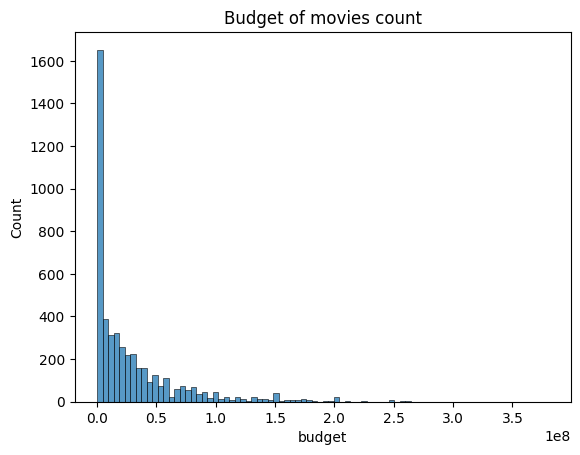

In [1764]:
sns.histplot(movies_df.budget)
plt.title("Budget of movies count")
# There are many more movies that have a low budget and are more cheaply made 
# than there are movies that have a bigger budget. 
# The cheaper the budget, the more movies are made.


Text(0.5, 1.0, 'Budget vs Revenue')

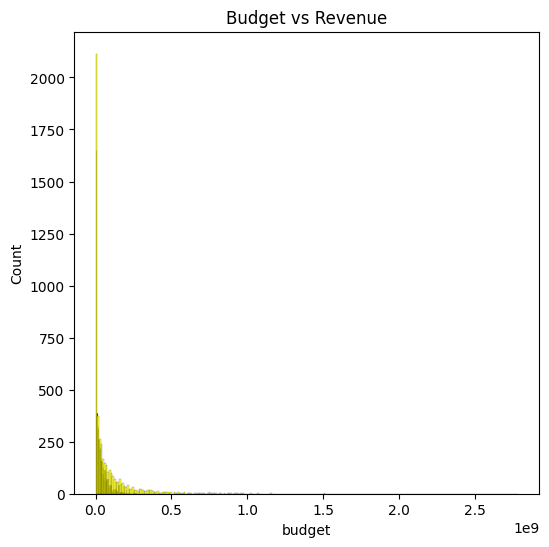

In [1766]:
# Graph depicts the correlation between budget and revenue of movies.
fig = plt.figure(figsize=(6, 6))
sns.histplot(movies_df.budget, color='black',label='Revenue')
sns.histplot(movies_df.revenue, color='yellow', label='Revenue')
plt.title('Budget vs Revenue')
# The is a direct positive correlation between the budget of movies and revenue.

Text(0.5, 1.0, 'Budget vs Revenue')

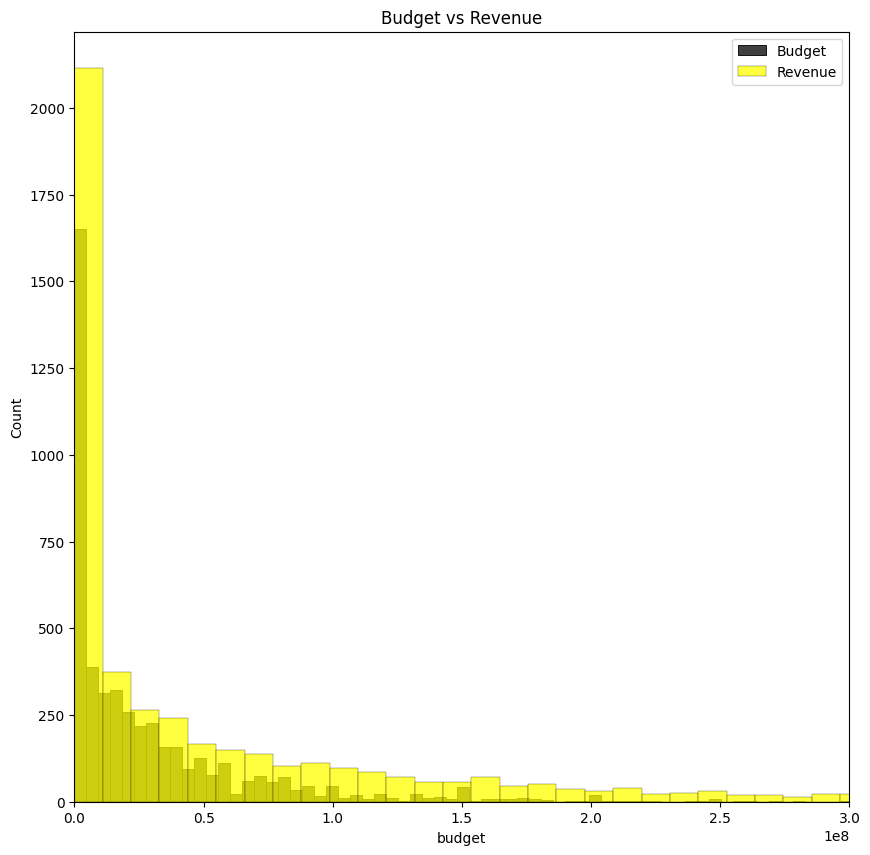

In [1767]:
# Taking a closer look in the graph of revenue vs budget.
fig = plt.figure(figsize=(10, 10))
sns.histplot(movies_df.budget, color='black', label='Budget');
sns.histplot(movies_df.revenue, color='yellow', label='Revenue');
plt.xlim(0,300000000)
plt.legend(loc='upper right')
plt.title('Budget vs Revenue')

# The lower the budget is the lower the revenue for the movie, thus
# it can be concluded that generally worth it to spend more money 
# on the production of a movie as it generates more revenue.

#### What are the top 5 most profitable movies? 

Compare the min and max profits. The comparison helps us identify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [1741]:
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']
movies_df.profit.describe()
# The minimum profit was a loss of -165710100.
# The maximum profit was a surplus of 2550965000.

count    4.800000e+03
mean     5.325198e+07
std      1.360023e+08
min     -1.657101e+08
25%     -7.993062e+05
50%      2.555615e+06
75%      5.537494e+07
max      2.550965e+09
Name: profit, dtype: float64

In [1768]:
# Looking at the movies with the highest profits.
movies_df.sort_values('profit', ascending=False).head()
# Most profitable movies are Avatar, Titanic, Jurassic World, Furious 7 and The Avengers.

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,profit
0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]",19995,150.437577,"[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2550965087
25,200000000,"[Drama, Romance, Thriller]",597,100.025899,[United States of America],1997-11-18,1845034188,194.0,"['English', 'Français', 'Deutsch', 'svenska', ...",Titanic,7.5,7562,1645034188
28,150000000,"[Action, Adventure, ScienceFiction, Thriller]",135397,418.708552,[United States of America],2015-06-09,1513528810,124.0,['English'],Jurassic World,6.5,8662,1363528810
44,190000000,[Action],168259,102.322217,"[Japan, United States of America]",2015-04-01,1506249360,137.0,['English'],Furious 7,7.3,4176,1316249360
16,220000000,"[ScienceFiction, Action, Adventure]",24428,144.448633,[United States of America],2012-04-25,1519557910,143.0,['English'],The Avengers,7.4,11776,1299557910


#### Find the most popular movies. 
Sort the dataframe based on the popularity column.

In [1770]:
movies_df.sort_values(by=['popularity'], ascending=False).head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,profit
546,74000000,"[Family, Animation, Adventure, Comedy]",211672,875.581305,[United States of America],2015-06-17,1156730962,91.0,['English'],Minions,6.4,4571,1082730962
95,165000000,"[Adventure, Drama, ScienceFiction]",157336,724.247784,"[Canada, United States of America, United King...",2014-11-05,675120017,169.0,['English'],Interstellar,8.1,10867,510120017
788,58000000,"[Action, Adventure, Comedy]",293660,514.569956,[United States of America],2016-02-09,783112979,108.0,['English'],Deadpool,7.4,10995,725112979
94,170000000,"[Action, ScienceFiction, Adventure]",118340,481.098624,"[United Kingdom, United States of America]",2014-07-30,773328629,121.0,['English'],Guardians of the Galaxy,7.9,9742,603328629
127,150000000,"[Action, Adventure, ScienceFiction, Thriller]",76341,434.278564,"[Australia, United States of America]",2015-05-13,378858340,120.0,['English'],Mad Max: Fury Road,7.2,9427,228858340


#### Find Movies which are rated above 7

In [1744]:
movies_df[movies_df['vote_average'] >= 7.0]

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2550965087
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,834939099
6,260000000,"['Animation', 'Family']",38757,48.681969,['United States of America'],2010-11-24,591794936,100.0,['English'],Tangled,7.4,3330,331794936
7,280000000,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767,1125403694
8,250000000,"['Adventure', 'Fantasy', 'Family']",767,98.885637,"['United Kingdom', 'United States of America']",2009-07-07,933959197,153.0,['English'],Harry Potter and the Half-Blood Prince,7.4,5293,683959197
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4766,0,"['Documentary', 'Music']",13963,3.277287,['United States of America'],1978-05-01,321952,117.0,['English'],The Last Waltz,7.9,64,321952
4773,27000,['Comedy'],2292,19.748658,['United States of America'],1994-09-13,3151130,92.0,['English'],Clerks,7.4,755,3124130
4792,20000,"['Crime', 'Horror', 'Mystery', 'Thriller']",36095,0.212443,['Japan'],1997-11-06,99000,111.0,['日本語'],Cure,7.4,63,79000
4797,0,"['Foreign', 'Thriller']",67238,0.022173,[],2005-03-12,0,80.0,[],Cavite,7.5,2,0


#### Most successful genres 
Create a bar plot explaining the frequency of movies in each genre.

In [1745]:
# The 'genres' column is striped and split to create a list free of characters.
movies_df['genres']=movies_df['genres'].str.strip('[]')
movies_df['genres']=movies_df['genres'].str.replace(' ','').str.replace("'",'').str.replace('"',' ')
movies_df['genres']=movies_df['genres'].str.split(',')
movies_df

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,profit
0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2550965087
1,300000000,"[Adventure, Fantasy, Action]",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,661000000
2,245000000,"[Action, Adventure, Crime]",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,635674609
3,250000000,"[Action, Crime, Drama, Thriller]",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,834939099
4,260000000,"[Action, Adventure, ScienceFiction]",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,24139100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[Action, Crime, Thriller]",9367,14.269792,"['Mexico', 'United States of America']",1992-09-04,2040920,81.0,['Español'],El Mariachi,6.6,238,1820920
4799,9000,"[Comedy, Romance]",72766,0.642552,[],2011-12-26,0,85.0,[],Newlyweds,5.9,5,-9000
4800,0,"[Comedy, Drama, Romance, TVMovie]",231617,1.444476,['United States of America'],2013-10-13,0,120.0,['English'],"Signed, Sealed, Delivered",7.0,6,0
4801,0,[],126186,0.857008,"['United States of America', 'China']",2012-05-03,0,98.0,['English'],Shanghai Calling,5.7,7,0


Text(0.5, 0, 'Count')

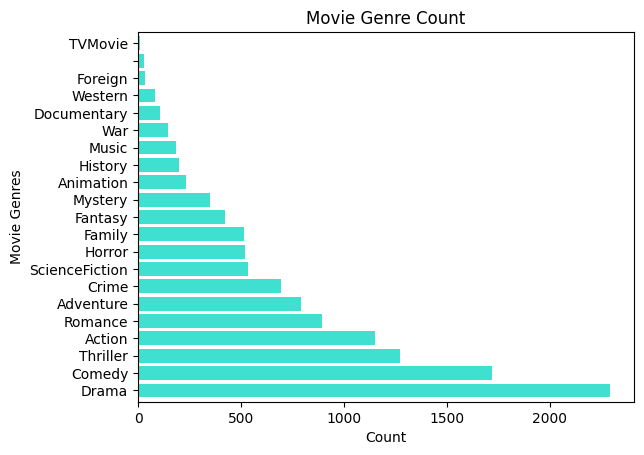

In [1771]:
# extending the list of genres to collect all the genres of all the profitable movies
genres_list = []
for i in movies_df['genres']:
    genres_list.extend(i)
genre_count = pd.Series(genres_list).value_counts()
genre_count.plot.barh(width = 0.8, color = 'turquoise')
plt.title('Movie Genre Count')
plt.ylabel('Movie Genres')
plt.xlabel("Count")

In [1747]:
movies_df['production_countries']=movies_df['production_countries'].str.strip('[]')
movies_df['production_countries']=movies_df['production_countries'].str.replace("'",'')
movies_df['production_countries']=movies_df['production_countries'].str.split(', ')
movies_df




,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,profit
0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]",19995,150.437577,"[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2550965087
1,300000000,"[Adventure, Fantasy, Action]",285,139.082615,[United States of America],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,661000000
2,245000000,"[Action, Adventure, Crime]",206647,107.376788,"[United Kingdom, United States of America]",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,635674609
3,250000000,"[Action, Crime, Drama, Thriller]",49026,112.312950,[United States of America],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,834939099
4,260000000,"[Action, Adventure, ScienceFiction]",49529,43.926995,[United States of America],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,24139100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[Action, Crime, Thriller]",9367,14.269792,"[Mexico, United States of America]",1992-09-04,2040920,81.0,['Español'],El Mariachi,6.6,238,1820920
4799,9000,"[Comedy, Romance]",72766,0.642552,[],2011-12-26,0,85.0,[],Newlyweds,5.9,5,-9000
4800,0,"[Comedy, Drama, Romance, TVMovie]",231617,1.444476,[United States of America],2013-10-13,0,120.0,['English'],"Signed, Sealed, Delivered",7.0,6,0
4801,0,[],126186,0.857008,"[United States of America, China]",2012-05-03,0,98.0,['English'],Shanghai Calling,5.7,7,0


In [1801]:
countries_list = []
for i in movies_df['production_countries']:
    countries_list.extend(i)
countries_count = pd.Series(countries_list).value_counts()
top = countries_count.head(10)
top
# The top 5 countries for movie production are United States of America, United Kingdom, Germany, France and Canada.



United States of America    3956
United Kingdom               635
Germany                      324
France                       306
Canada                       261
                             173
Australia                    110
Italy                         71
Spain                         71
China                         59
Name: count, dtype: int64

Text(0, 0.5, 'Production Country')

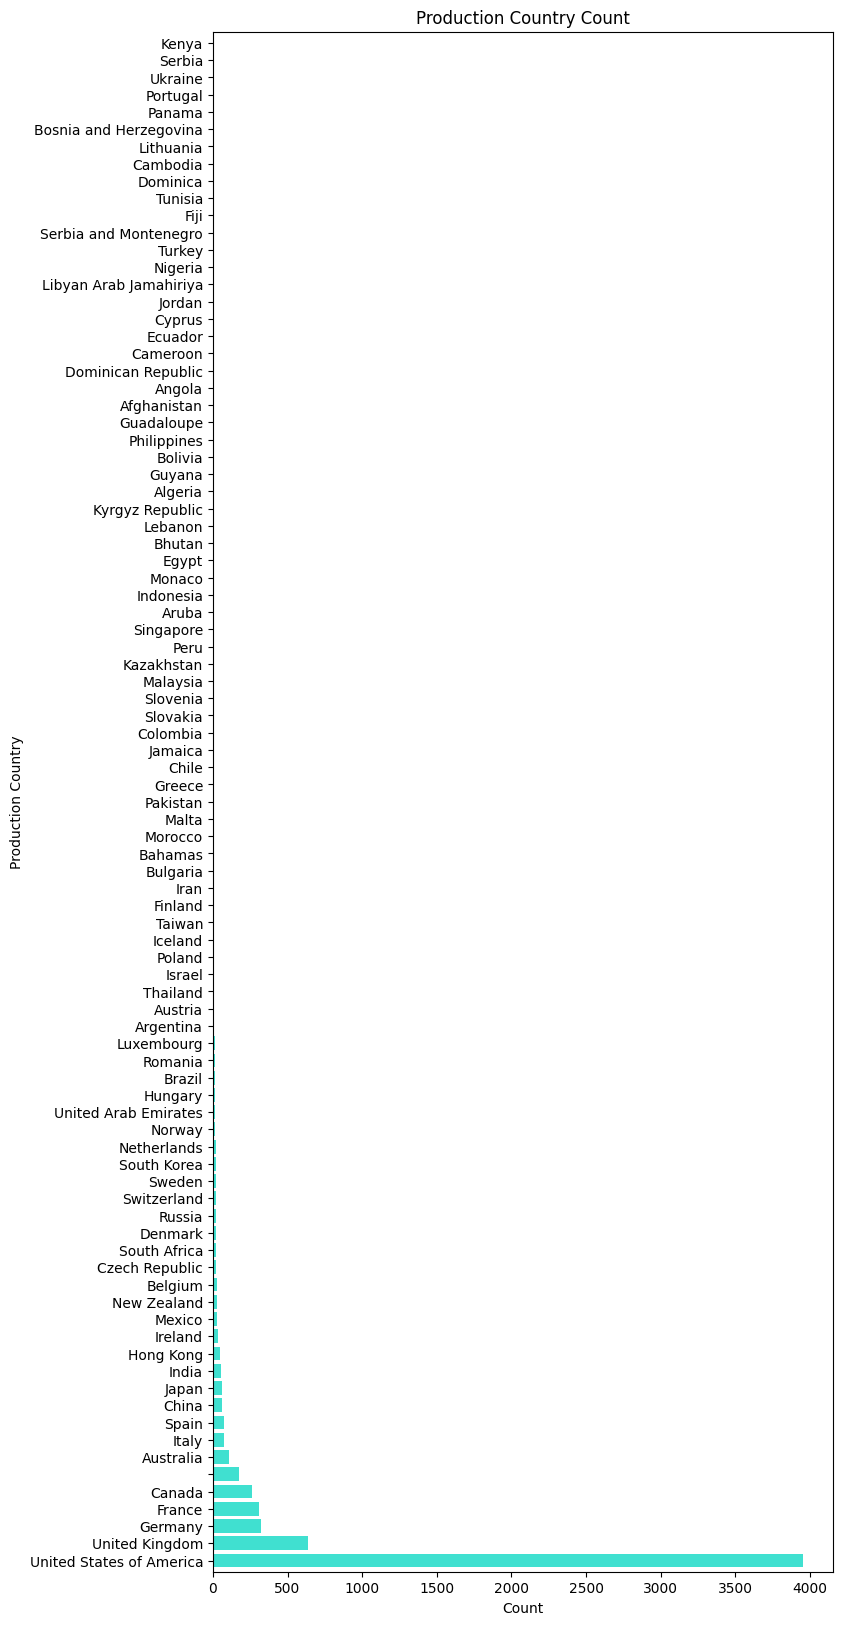

In [1804]:
# Count plot of production countries.
plt.figure(figsize=(8,20))
countries_count.plot.barh(width = 0.8, color = 'turquoise')
plt.title('Production Country Count')
plt.xlabel('Count')
plt.ylabel('Production Country')

Text(0, 0.5, 'Production Country')

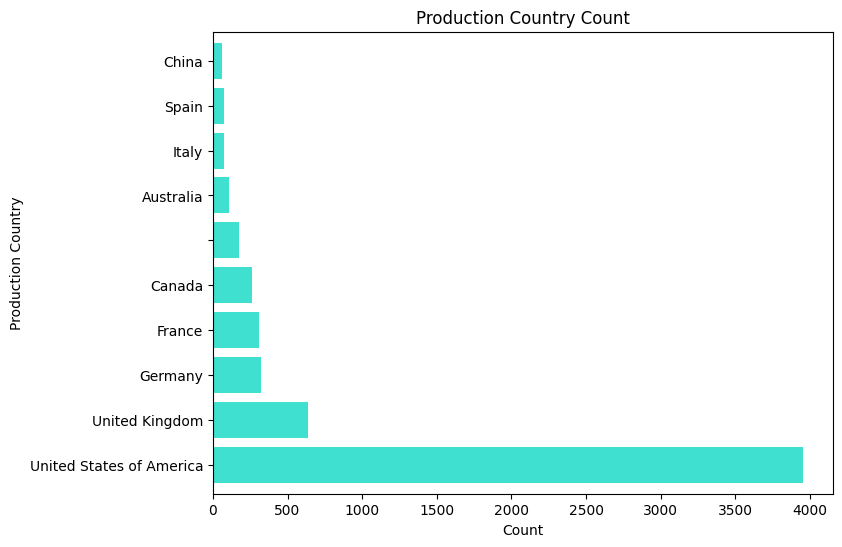

In [1805]:
plt.figure(figsize=(8,6))
top.plot.barh(width = 0.8, color = 'turquoise')
plt.title('Production Country Count')
plt.xlabel('Count')
plt.ylabel('Production Country')


Text(0, 0.5, 'Popularity')

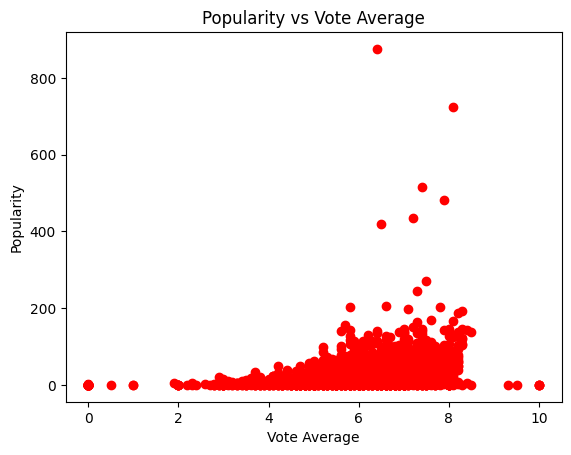

In [1758]:
# Relationship between the vote average and the popularity.
y = movies_df.popularity
x = movies_df['vote_average']
plt.scatter(x,y, color = 'red')
plt.title('Popularity vs Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
# As the vote average increases, there is a slight rise in popularity.


Text(0, 0.5, 'Vote Count')

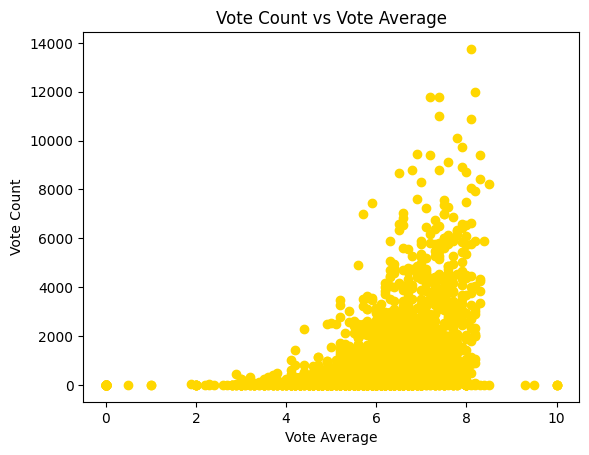

In [1806]:
x = movies_df['vote_average']
y = movies_df['vote_count']
plt.scatter(x,y, color='gold')
plt.title('Vote Count vs Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Vote Count')
# As the voteaverage increases, there is a greater likelihood that the vote count is high.
